<h2>Summary: automatisation</h2>


<p>This section involves building functions to automate common marketing analysis and determine why certain marketing channels saw lower than usual conversion rates during late January. The project includes building a conversion function, testing and visualizing the function, and plotting results.</p>

In [1]:
import package
import package.funcs
from package import funcs

In [2]:
funcs.test()

Hello


In [3]:
package.funcs.add(1,2)

3

In [4]:
funcs.add(1,3)

4

In [5]:
1+1

2

<h1>Import packages</h1>

In [6]:
# import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import matplotlib as mpl
from cycler import cycler

import pandas as pd
import numpy as np
import os as os
import time
import pprint
import sys
import re
import json
import itertools
import datetime as dt
import scipy.stats as stats
import scipy


import pandas_datareader.data as web

# security
from dotenv import load_dotenv

<h1>Set up</h1>

In [7]:
cwd=os.getcwd()
print(cwd)

C:\Users\gamarandor\data_science\data_science_projects\data_camp_projects\Analyzing_Marketing_Campaigns_with_pandas


<p>Requirement files</p>

In [8]:
!conda list > txt/requirements_conda.txt

In [9]:
!pip freeze > txt/requirements_pip.txt

<h1>Import data</h1>

In [10]:

# Assuming missing values are represented by 'NA'
marketing = pd.read_csv(r'data/marketing_data_cleaned.csv',
                        parse_dates=True, 
                        date_format='%Y-%m-%d',
                        na_values=['NA'])  # Coerce invalid parsing to NaT


# marketing.index.rename('Index')

In [11]:
print(type(marketing.index))

<class 'pandas.core.indexes.range.RangeIndex'>


In [12]:
marketing['date_served'] = pd.to_datetime(marketing['date_served'] , format="mixed")
marketing.drop(['Unnamed: 0'], inplace=True, axis=1)

In [13]:
# Check data types after reading
print(marketing.dtypes)

user_id                            object
date_served                datetime64[ns]
marketing_channel                  object
variant                            object
converted                            bool
language_displayed                 object
language_preferred                 object
age_group                          object
subscribing_channel                object
is_retained                          bool
HouseAds                             bool
marketing_channel_coded             int64
channel_code                      float64
is_correct_lang                    object
dtype: object


<h1>Inspecting the data</h1>

In [14]:
print(marketing.info())
print('------------------------------------------------------------------------------')

print(marketing.head().iloc[:, 0:5])
print('------------------------------------------------------------------------------')

print(marketing.head().iloc[:, 6:10])
print('------------------------------------------------------------------------------')

print(marketing.head().iloc[:, 11:12])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user_id                  10037 non-null  object        
 1   date_served              10037 non-null  datetime64[ns]
 2   marketing_channel        10037 non-null  object        
 3   variant                  10037 non-null  object        
 4   converted                10037 non-null  bool          
 5   language_displayed       10037 non-null  object        
 6   language_preferred       10037 non-null  object        
 7   age_group                10037 non-null  object        
 8   subscribing_channel      1856 non-null   object        
 9   is_retained              10037 non-null  bool          
 10  HouseAds                 10037 non-null  bool          
 11  marketing_channel_coded  10037 non-null  int64         
 12  channel_code             1856 no

<h3>Missing values?</h3>

In [15]:
marketing.isna().sum().sort_values(ascending=False)

subscribing_channel        8181
channel_code               8181
user_id                       0
date_served                   0
marketing_channel             0
variant                       0
converted                     0
language_displayed            0
language_preferred            0
age_group                     0
is_retained                   0
HouseAds                      0
marketing_channel_coded       0
is_correct_lang               0
dtype: int64

<h2>Automatization with user-defined functions</h2>
<h2>Conversion rate</h2>

<p>
= Number of goal achievments / total number of target group
</p>

<p>
Number of target group: visitors of website, customers ...<br>
Number of goal achievments: clicks on button, subscription, purchases...
</p>

In [16]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = \
    dataframe[dataframe['converted']==True].groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

In [17]:
# Calculate conversion rate by age_group
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])
print(age_group_conv.head())

print('------------------------------------------------------------------------------')
# Unstack and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack())
print(age_group_df.iloc[:2, :4])


date_served  age_group  
2018-01-01   0-18 years     0.155172
             19-24 years    0.196721
             24-30 years    0.105263
             30-36 years    0.040816
             36-45 years    0.042553
Name: user_id, dtype: float64
------------------------------------------------------------------------------
age_group    0-18 years  19-24 years  24-30 years  30-36 years
date_served                                                   
2018-01-01     0.155172     0.196721     0.105263     0.040816
2018-01-02     0.206349     0.197368     0.142857     0.076923


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


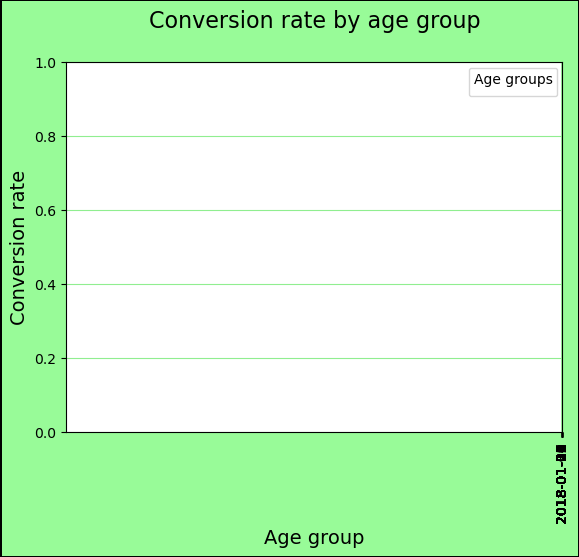

In [18]:

# Visualize conversion by age_group
#age_group_df.plot(figsize=(6,4))

plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)


plt.grid(linestyle="solid", color="lightgreen")

plt.xticks(ticks=age_group_df.index.tolist(), 
           labels=age_group_df.index.date,
           rotation=90)
plt.legend(loc='upper right', fontsize=8, title="Age groups")

# Set the background color
fig = plt.gcf()  # get the current figure
fig.patch.set_facecolor('palegreen')  # set the background color to light gray
fig.patch.set_edgecolor('black')  # set the border color to black
fig.patch.set_linewidth(2)  # set the border width to 2 points

plt.savefig('images/ConversionRateAge')

plt.show()

<h3>
Plotting function
</h3>

In [19]:
def plotting_conv(dataframe):
    
    for column in dataframe:
        plt.figure(figsize=(5,2))
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', 
                  size = 9)
        plt.ylabel('Conversion rate', size = 9)
        plt.xlabel('Date', size = 9)
        
        plt.xticks(rotation=90, fontsize=8)
        
        plt.grid(linestyle='dashed')
        # Show plot
        plt.show()
        plt.clf()

<p>Plotting</p>

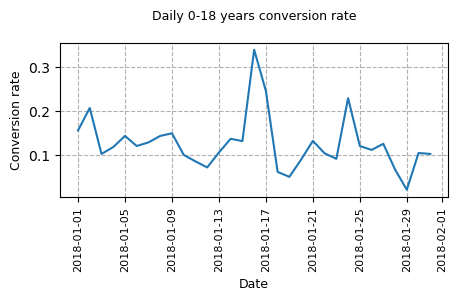

<Figure size 640x480 with 0 Axes>

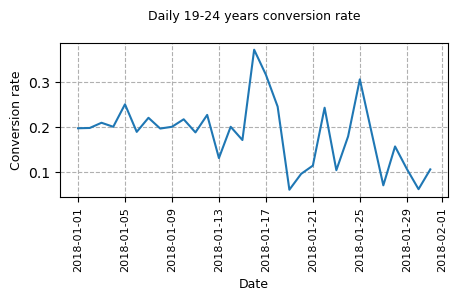

<Figure size 640x480 with 0 Axes>

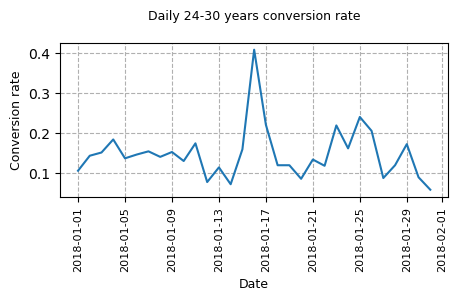

<Figure size 640x480 with 0 Axes>

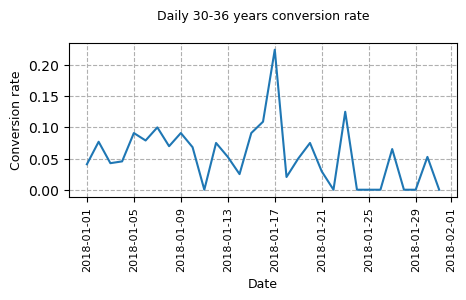

<Figure size 640x480 with 0 Axes>

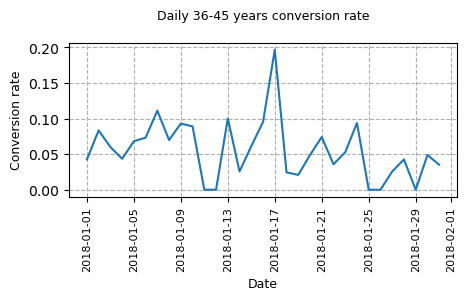

<Figure size 640x480 with 0 Axes>

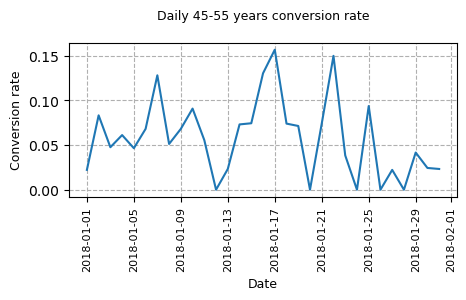

<Figure size 640x480 with 0 Axes>

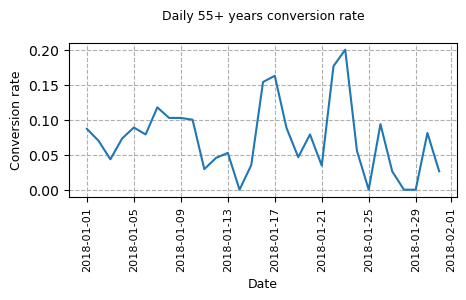

<Figure size 640x480 with 0 Axes>

In [20]:
plotting_conv(age_group_df)

def plotting_conv(dataframe):
    num_plots = len(dataframe.columns)
    fig, axs = plt.subplots(nrows=num_plots, ncols=1, figsize=(8, 3*num_plots))
    
    for i, column in enumerate(dataframe.columns):
        axs[i].plot(dataframe.index, dataframe[column])
        axs[i].set_title('Daily ' + str(column) + ' conversion rate\n', size = 16)
        axs[i].set_ylabel('Conversion rate', size = 14)
        axs[i].set_xlabel('Date', size = 14)
    
    plt.tight_layout()
    plt.show()

date_served  age_group  
2018-01-01   0-18 years     0.155172
             19-24 years    0.196721
             24-30 years    0.105263
             30-36 years    0.040816
             36-45 years    0.042553
                              ...   
2018-01-31   24-30 years    0.057692
             30-36 years    0.000000
             36-45 years    0.035088
             45-55 years    0.023256
             55+ years      0.026316
Name: user_id, Length: 217, dtype: float64
date_served  age_group  
2018-01-01   0-18 years     0.155172
             19-24 years    0.196721
             24-30 years    0.105263
             30-36 years    0.040816
             36-45 years    0.042553
                              ...   
2018-01-31   24-30 years    0.057692
             30-36 years    0.000000
             36-45 years    0.035088
             45-55 years    0.023256
             55+ years      0.026316
Name: user_id, Length: 217, dtype: float64
<class 'NoneType'>


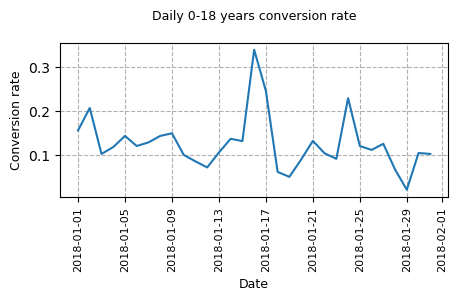

<Figure size 640x480 with 0 Axes>

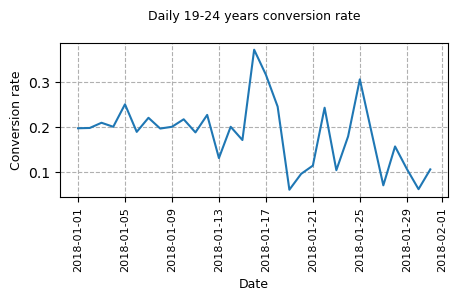

<Figure size 640x480 with 0 Axes>

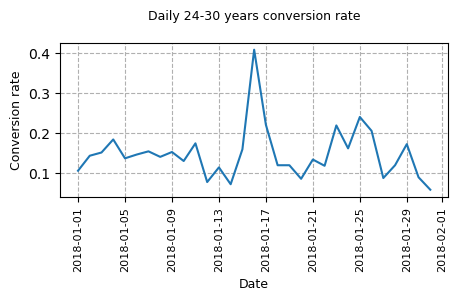

<Figure size 640x480 with 0 Axes>

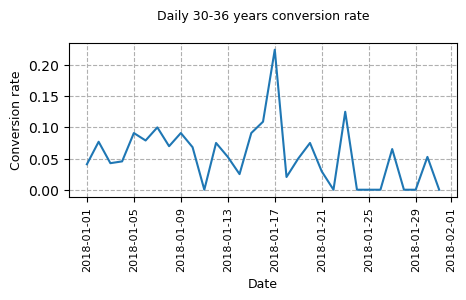

<Figure size 640x480 with 0 Axes>

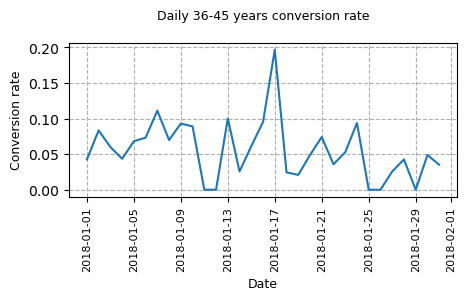

<Figure size 640x480 with 0 Axes>

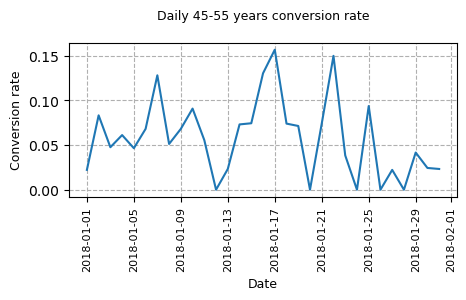

<Figure size 640x480 with 0 Axes>

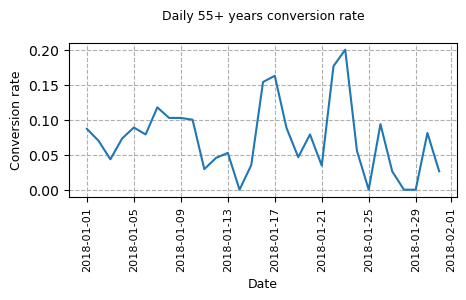

<Figure size 640x480 with 0 Axes>

In [21]:
# Calculate conversion rate by date served and age group
age_group_conv = conversion_rate(marketing, ['date_served','age_group'])
print(age_group_conv)
print(type(print(age_group_conv)))


# Unstack age_group_conv and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Plot the results
plotting_conv(age_group_df)